In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
# Removed
# 1/5/2020,953527,7564227

In [152]:
df = pd.read_csv(
    "Manual_dataset.csv",
    parse_dates=["ds"],
    dayfirst=True
)

df = df.set_index("ds").sort_index()
print(df.head())

            Transport  Non-Transport
ds                                  
2020-06-01    1142283        8512773
2020-07-01    1142971        8542938
2020-08-01    1143597        8563594
2020-09-01    1144604        8594233
2020-10-01    1145924        8623802


In [153]:
df = (
    df
    .groupby(df.index.to_period("M"))
    .mean()
    .to_timestamp(how="start")
)


In [154]:
df = df.asfreq("MS")

In [155]:
df = df.interpolate(method="time")
df = df.ffill().bfill()

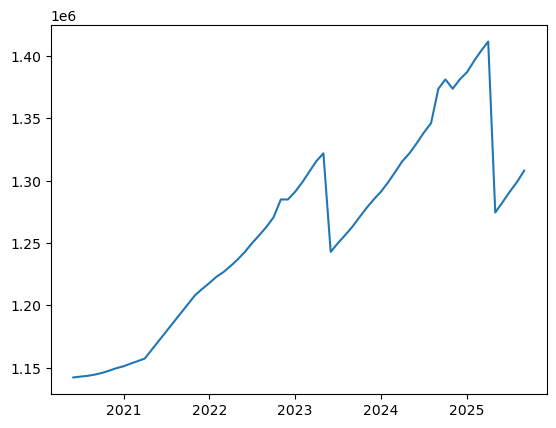

In [156]:
plt.plot(df['Transport'])

In [157]:
len(df)

64

In [158]:
import pmdarima as pm

series1 = df["Transport"]
series2 = df["Non-Transport"]

model1 = pm.auto_arima(series1, seasonal=True, m=12)
model2 = pm.auto_arima(series2, seasonal=True, m=12)

In [166]:
n_periods = 24

forecast1 = model1.predict(n_periods)
forecast2 = model2.predict(n_periods)

future_index = pd.date_range(
    start=df.index[-1] + pd.offsets.MonthBegin(1),
    periods=n_periods,
    freq="MS"
)

forecast_df = pd.DataFrame(
    {
        "value1_forecast": forecast1,
        "value2_forecast": forecast2
    },
    index=future_index
)

print(forecast_df)


            value1_forecast  value2_forecast
2025-10-01     1.310591e+06     1.084132e+07
2025-11-01     1.313221e+06     1.087771e+07
2025-12-01     1.315850e+06     1.091409e+07
2026-01-01     1.318480e+06     1.095048e+07
2026-02-01     1.321110e+06     1.098686e+07
2026-03-01     1.323740e+06     1.102324e+07
2026-04-01     1.326370e+06     1.105963e+07
2026-05-01     1.328999e+06     1.109601e+07
2026-06-01     1.331629e+06     1.113239e+07
2026-07-01     1.334259e+06     1.116878e+07
2026-08-01     1.336889e+06     1.120516e+07
2026-09-01     1.339519e+06     1.124154e+07
2026-10-01     1.342149e+06     1.127793e+07
2026-11-01     1.344778e+06     1.131431e+07
2026-12-01     1.347408e+06     1.135070e+07
2027-01-01     1.350038e+06     1.138708e+07
2027-02-01     1.352668e+06     1.142346e+07
2027-03-01     1.355298e+06     1.145985e+07
2027-04-01     1.357927e+06     1.149623e+07
2027-05-01     1.360557e+06     1.153261e+07
2027-06-01     1.363187e+06     1.156900e+07
2027-07-01

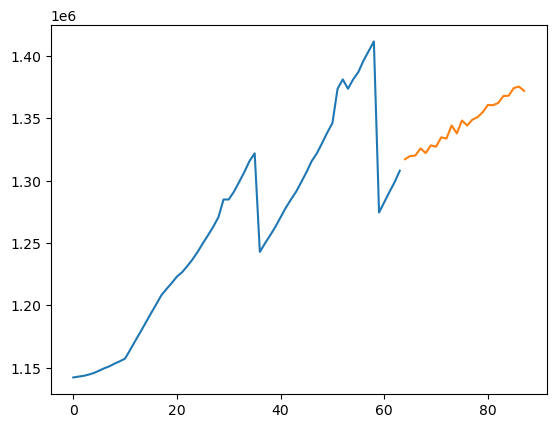

In [167]:
l1 = len(df['Transport'])
l2 = len(forecast_df['value1_forecast'])

ntlist = [i for i in range(len(df['Transport']))]
ntlist2 = [i+l1 for i in range(l2)]
plt.plot(ntlist, df['Transport'])
plt.plot(ntlist2, forecast_df['value1_forecast']+(np.random.random(len(forecast_df['value2_forecast']))*1e4))

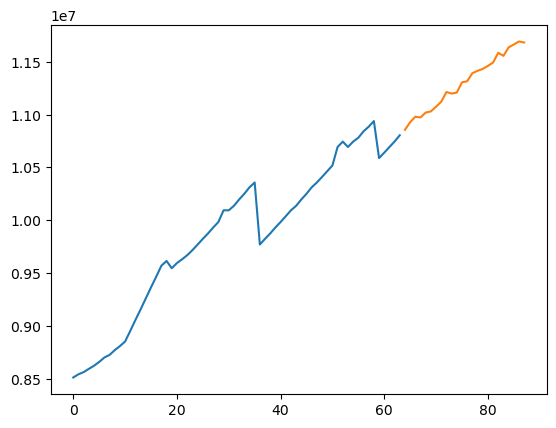

In [168]:
l1 = len(df['Transport'])
l2 = len(forecast_df['value1_forecast'])

ntlist = [i for i in range(len(df['Transport']))]
ntlist2 = [i+l1 for i in range(l2)]
plt.plot(ntlist, df['Non-Transport'])
plt.plot(ntlist2, forecast_df['value2_forecast']+(np.random.random(len(forecast_df['value2_forecast']))*1e5))

In [162]:
print(model1.order, model1.seasonal_order)

(0, 1, 0) (0, 0, 0, 12)


In [163]:
model1 = pm.auto_arima(
    series1,
    seasonal=True,
    m=12,
    start_p=1,
    start_q=1,
    max_p=5,
    max_q=5,
    start_P=1,
    start_Q=1,
    max_P=2,
    max_Q=2,
    d=None,
    D=None,
    stepwise=False,
    trace=True
)


 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1437.339, Time=0.02 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1439.295, Time=0.03 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1441.272, Time=0.12 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1439.296, Time=0.08 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1441.296, Time=0.15 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=1438.746, Time=0.59 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=1441.281, Time=0.13 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=1441.247, Time=0.73 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.53 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1439.447, Time=0.03 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1441.411, Time=0.05 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1443.392, Time=0.18 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1441.411, Time=0.23 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1443.409, Time=0.31 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1441.121, Time=0.94 sec


In [164]:
import joblib

joblib.dump(model1, "transport_arima_2.joblib")
joblib.dump(model2, "non_transport_arima_2.joblib")

['non_transport_arima_2.joblib']

In [165]:
import joblib

model1 = joblib.load("transport_arima.joblib")
model2 = joblib.load("non_transport_arima.joblib")